### Stock Price Predictor 

In this project, we will work on a time series problem or I can say regression problem which is a Stock Price Prediction, We will Predict the stock prices of Gold.  
You can work on any.  

Requirements:- 

- You should have completed Linear Regression Section 
- You should have completed the Support Vector Machine Section  

In this project, we will develop our stock price predictor using only these two predictors. In research papers, SVM, Regression algorithms  works best as compared to any other machine learning algorithms, ofc ensembling learning, stacking will work which we will study in details in further sections.  
So, let's get started with this project. 

Before you get started, be sure you have downloaded the following package:- 
```Python 
pip install yfinance 
``` 

ONLY for Educational

In [ ]:
#!pip install yfinance 

In [44]:
import numpy as np 
import pandas as pd   

import yfinance as yf 

import seaborn as sns 
import matplotlib.pyplot as plt   
%matplotlib inline 

In [ ]:
stocks = input("Enter the code of the stock:- ") 
data = yf.download(stocks, "2008-01-01", "2021-01-18", auto_adjust=True) 
data.head()

In [ ]:
data.shape 

(3282, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3282 entries, 2008-01-02 to 2021-01-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3282 non-null   float64
 1   High    3282 non-null   float64
 2   Low     3282 non-null   float64
 3   Close   3282 non-null   float64
 4   Volume  3282 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 153.8 KB


In [ ]:
data.describe()

,Open,High,Low,Close,Volume
count,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000
mean,3.713705,3.787288,3.635038,3.707074,131397.603595
std,1.830425,1.865744,1.789584,1.825297,54393.040171
min,1.441000,1.567000,1.432000,1.482000,0.000000
25%,2.691250,2.736500,2.644000,2.693000,91744.250000
50%,3.253000,3.312000,3.183500,3.240500,126669.500000
75%,4.157750,4.244750,4.066750,4.152000,161490.500000
max,13.580000,13.694000,13.306000,13.577000,459196.000000


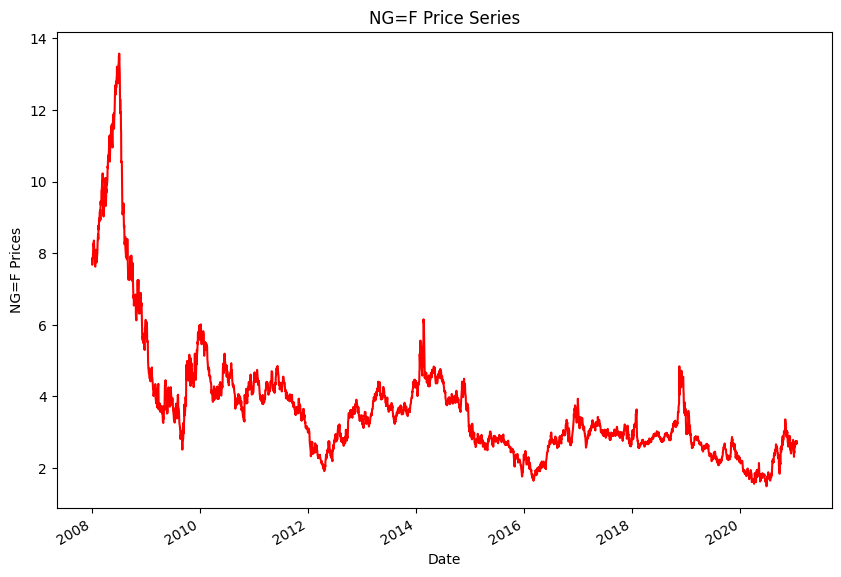

In [ ]:
data.Close.plot(figsize=(10, 7),color='r')
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

<Axes: xlabel='Close', ylabel='Count'>

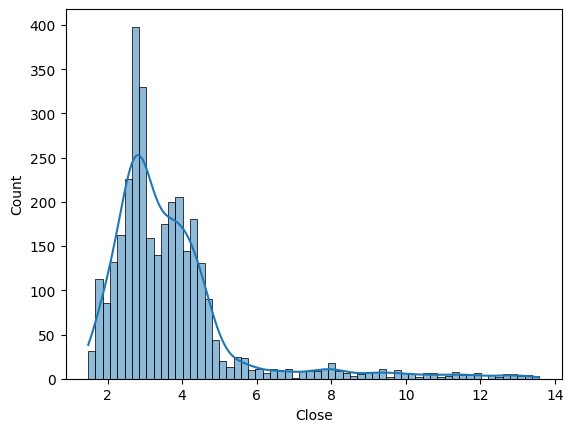

In [ ]:
sns.histplot(data["Close"], kde=True)

<Axes: xlabel='Open', ylabel='Count'>

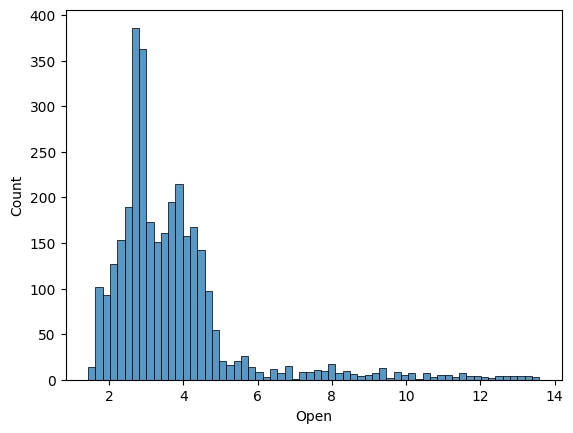

In [ ]:
sns.histplot(data["Open"])

<Axes: xlabel='High', ylabel='Count'>

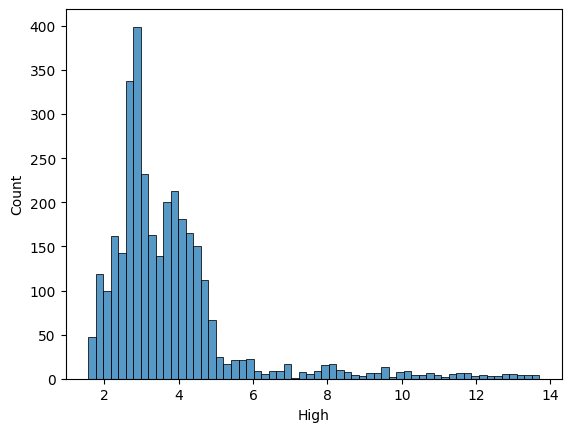

In [ ]:
sns.histplot(data["High"])

In [ ]:
# Conlusions we understand from the given data

# - Shape the of the data  
# - how our data is distributed 
# - It's very very non linear  

# Linear, Logis, Regularized, SVM 

X = data.drop("Close", axis=1) 
y = data["Close"] 

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2, random_state=0) 
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape) 

(2625, 4)
(657, 4)
(2625,)
(657,)


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() 
lr.fit(X_train, y_train) 
pred1 = lr.predict(X_test)

In [ ]:
print("actual value", y_test[1])
print("predicted value", pred1[1])

actual value 5.821000099182129
predicted value 5.71452107339444


/tmp/ipykernel_69437/2205083757.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("actual value", y_test[1])


In [ ]:
# MSE -- > Mean Squared , value close to zero indicates model performing well 
# RMSE ---> sart(MSE) , value close to zero indicates model performing well
# r2_square ---> 1.0 # good model 
"""
The r2_score function from scikit-learn (sklearn.metrics) is used to calculate the coefficient of determination, often referred to as R-squared. R-squared is a statistical measure that represents the proportion of the variance in the dependent variable (target) that can be explained by the independent variables (features) in a regression model.

The r2_score function takes two arguments: the true values of the target variable and the predicted values from a regression model. It returns a value between 0 and 1, where 1 indicates a perfect fit of the model to the data, and 0 indicates that the model does not explain any of the variance in the target variable.
"""

from sklearn.metrics import mean_squared_error, r2_score 


def calculate_metrics(y_test, y_pred):  
    ''' 
    y_test:- ground truth 
    y_pred:- model predict  
    '''
    mse = mean_squared_error(y_test, y_pred) 
    rmse = np.sqrt(mse) 
    r2_scors = r2_score(y_test, y_pred) 
    
    print("MSE:- ", mse) 
    print("RMSE:- ", rmse) 
    print("R2_score:- ", r2_scors) 
    
calculate_metrics(y_test, pred1)

MSE:-  0.0015345662928675724
RMSE:-  0.03917354072416192
R2_score:-  0.9994383299702778


In [ ]:
from sklearn.linear_model import Lasso, Ridge 
# Lasso, Ridge  are more regularized linear models which means incase there is an overfitting on the linear regression model they will fix it by reducing the noises that causes the overfitting and give better prediction than before
# Lasso removes the least important feature that may cause a  noise to result overfitting
# Ridge more penalized the least important features, it means it reduces their impact on the prediction during the training process
la = Lasso().fit(X_train, y_train )
ri = Ridge().fit(X_train, y_train ) 

la_p = la.predict(X_test) 
ri_p = ri.predict(X_test)

In [ ]:
calculate_metrics(y_test, la_p)

MSE:-  0.2369233626053282
RMSE:-  0.4867477402159441
R2_score:-  0.9132831519010188


In [ ]:
calculate_metrics(y_test, ri_p)

MSE:-  0.0016151026199620988
RMSE:-  0.04018833935312703
R2_score:-  0.9994088526896656


From the above three model we tested that is linear regression, Lasso Regularization and Ridge Regularization. The linear regression and ridge regularization linear has performed great according to their calculate metrics value, and from the two Ridge regularization has done well and plus it also solving the overfitting problem that might be happened, so we will take the Ridge regularization linear model as our final better model to use for prediction 

Now Cache or store the rigid model to use it in our frontend user interface

In [ ]:

import joblib  
# joblib is a python package that lets us cache a model instead rerun it everytime like a vectior database does for embedding model vector values

joblib.dump(ri, 'rigidmodel.pkl') 

ridge_from_joblib = model = joblib.load("rigidmodel.pkl")

SUPPORT VECTOR MACHINE REGULARIZATION(SVR) IMPLEMENTATION

In [46]:
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV 

svr = SVR() 


param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}   

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)    
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.075 total time=   0.2s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.070 total time=   0.2s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.072 total time=   0.2s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.073 total time=   0.2s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.050 total time=   0.2s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.074 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.070 total time=   0.2s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.072 total time=   0.2s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.072 total time=   0.2s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.050 total time=   0.2s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.073 total time=   0.2s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [47]:
svr = SVR(C=10, gamma=0.01, kernel='rbf') 
svr.fit(X_train, y_train) 
svr_pred = svr.predict(X_test) 

In [48]:
calculate_metrics(y_test, svr_pred)

MSE:-  2.708318019914072
RMSE:-  1.6456968189536225
R2_score:-  0.008722484123056873


As you can see the SVR model doesn't perform well at all